<b> <font color='green'><font size=6> Multi Linear Regression: </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.shape

(50, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df = df.rename(columns={"R&D Spend":"RDS", "Administration":"admin", "Marketing Spend":"marketing", "State":"state","Profit":"profit"})
df.head()

,RDS,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.isnull().sum()

RDS          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

In [9]:
df[df.duplicated()]

,RDS,admin,marketing,state,profit


In [10]:
df[df.values==0]

,RDS,admin,marketing,state,profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


Zero context means, no money spend in the Department

In [11]:
print("Zero values in R&D Spend is ", (df["RDS"]==0).sum())
print("Zero values in Administration is ", (df["admin"]==0).sum())
print("Zero values in Marketing is ", (df["marketing"]==0).sum())
print("Zero values in Profit is ", (df["profit"]==0).sum())

Zero values in R&D Spend is  2
Zero values in Administration is  0
Zero values in Marketing is  3
Zero values in Profit is  0


In [12]:
continuous_features = [i for i in df.columns if df[i].dtype!='O']
print(continuous_features)

['RDS', 'admin', 'marketing', 'profit']


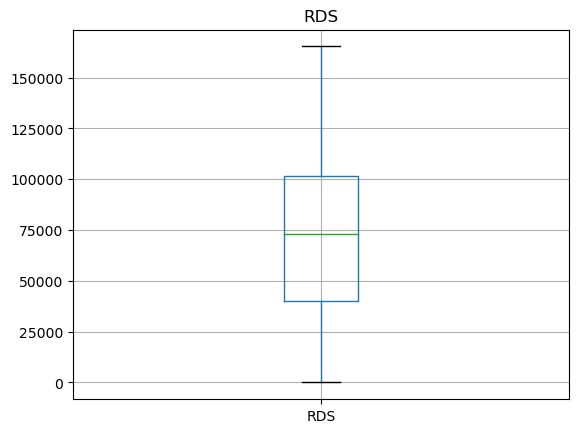

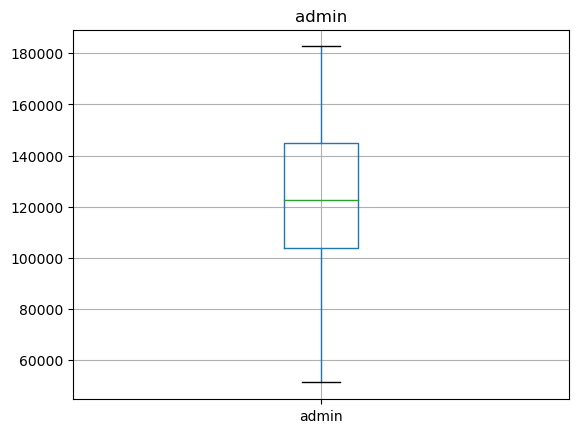

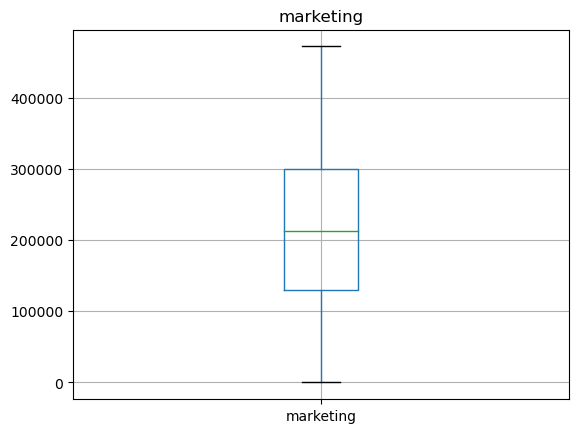

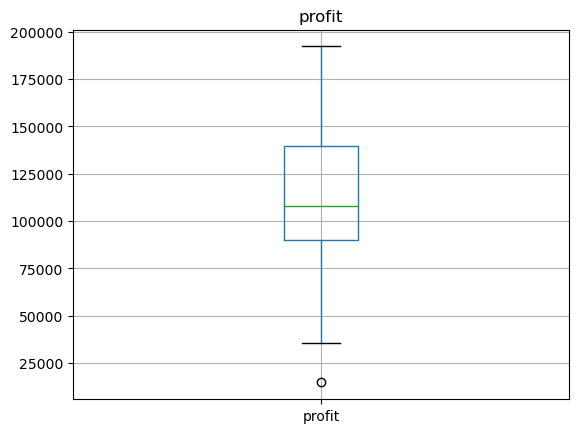

In [13]:
for i in continuous_features:
    df.boxplot(column = i)
    plt.title(i)
    plt.show()

from the boxplot of categorical features we can see that Independent Variables do not have any outlier in it but Dependent Variable "Profit" is havinng outliers.

In [14]:
df["profit"].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: profit, dtype: float64

In [15]:
Q1 = np.quantile(df["profit"], 0.25)
Q3 = np.quantile(df["profit"], 0.75)
IQR = Q3-Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

print("Inter Quartile Range = ",IQR)
print("Upper Bound = ", upper)
print("Lower Bound = ", lower)

Inter Quartile Range =  49627.07499999998
Upper Bound =  214206.58999999997
Lower Bound =  15698.290000000023


In [16]:
outliers = df.profit[(df.profit <= lower) | (df.profit >= upper)]
print("Outliers : ", outliers)

Outliers :  49    14681.4
Name: profit, dtype: float64


In [17]:
df.tail()

,RDS,admin,marketing,state,profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


{'whiskers': [<matplotlib.lines.Line2D at 0x27d35547ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d365eb370>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d35547c10>],
 'medians': [<matplotlib.lines.Line2D at 0x27d365eb910>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d365ebbe0>],
 'means': []}

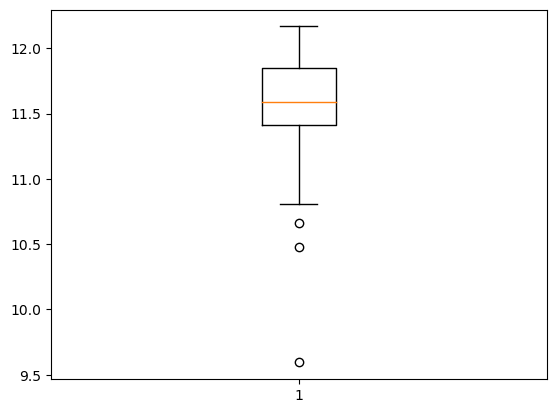

In [18]:
plt.boxplot(np.log(df["profit"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x27d354da1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27d354c0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d354dacd0>],
 'medians': [<matplotlib.lines.Line2D at 0x27d354c0e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d354c0580>],
 'means': []}

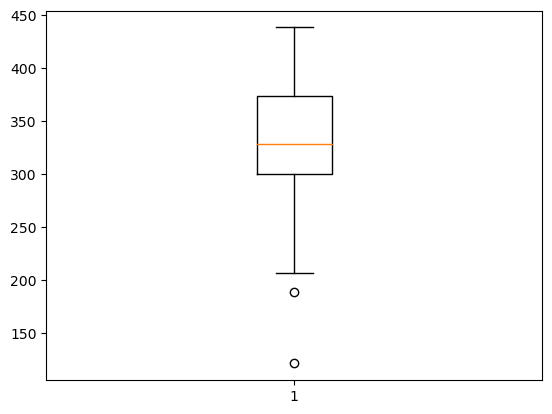

In [19]:
plt.boxplot(np.sqrt(df["profit"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x27d365b2370>,
 'caps': [<matplotlib.lines.Line2D at 0x27d365b2a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x27d365b2460>],
 'medians': [<matplotlib.lines.Line2D at 0x27d36591a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x27d35416eb0>],
 'means': []}

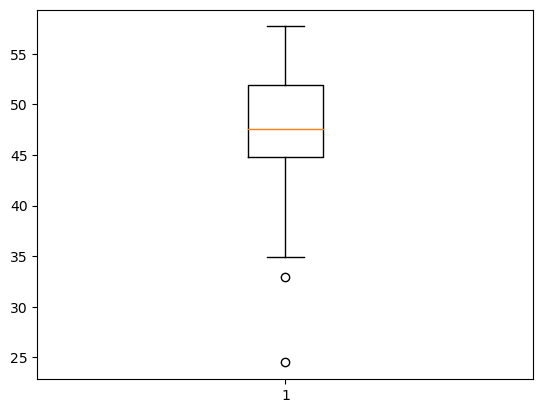

In [20]:
plt.boxplot(np.cbrt(df["profit"]))

Imputing median in place of Outlier

In [21]:
df["profit"].median()

107978.19

Text(0.5, 1.0, 'Before median imputation')

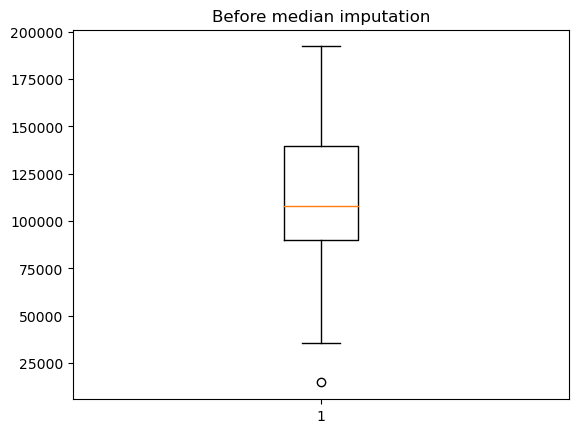

In [22]:
df_med = df.copy()
plt.boxplot(df_med["profit"])
plt.title("Before median imputation")

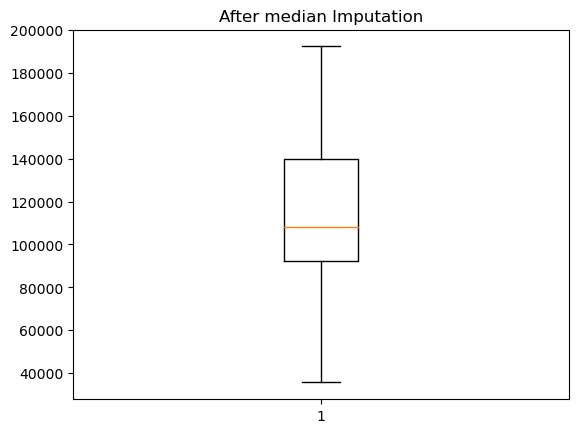

In [23]:
for i in df_med["profit"]:
    Q1 = np.quantile(df_med["profit"], 0.25)
    Q3 = np.quantile(df_med["profit"], 0.75)
    median = np.median(df_med["profit"])
    IQR = Q3-Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    if i>upper or i<lower:
        df_med["profit"] = df_med["profit"].replace(i, np.median(df_med["profit"]))
        
plt.boxplot(df_med["profit"])
plt.title("After median Imputation")
plt.show()

In [24]:
med_data = sm.ols("profit~RDS+admin+marketing", data = df_med).fit()
med_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Fri, 12 May 2023   Prob (F-statistic):           5.06e-25
Time:                        03:25:45   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RDS            0.7472      0.055     13.707      0.000       0.638       0.857
admin         -0.0149      0.062     -0.242      0.810      -0.139       0.109
marketing      0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from scipy.stats import shapiro

Now conducting Shapiro-Wilk test to check the normality of the dataset after median imputation.

<b>Shapiro Wilk Test: </b> <br>
<b>* *If the p-value ≤ 0.05, then we reject the null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.*</b> <br>
<b>* *If the p-value > 0.05, then we fail to reject the null hypothesis i.e. we assume the distribution of our variable is normal/gaussian.*</b>

In [26]:
print("RnD Spend(statistics and p_value)", shapiro(df_med["RDS"]))
print("\nAdministration(statistics and p_value)", shapiro(df_med["admin"]))
print("\nMarketing(statistics and p_value)", shapiro(df_med["marketing"]))
print("\nProfit(statistics and p_value)", shapiro(df_med["profit"]))

RnD Spend(statistics and p_value) ShapiroResult(statistic=0.9673415422439575, pvalue=0.18005383014678955)

Administration(statistics and p_value) ShapiroResult(statistic=0.9702357649803162, pvalue=0.23660743236541748)

Marketing(statistics and p_value) ShapiroResult(statistic=0.9743665456771851, pvalue=0.3450852632522583)

Profit(statistics and p_value) ShapiroResult(statistic=0.9786480069160461, pvalue=0.4964573383331299)


Here p_value(for profit) > 0.05, we reject the Null Hypothesis.

Median imputatation model is not perfoeming well


Mean Imputation in place of Outliers

In [27]:
df_mean = df.copy()

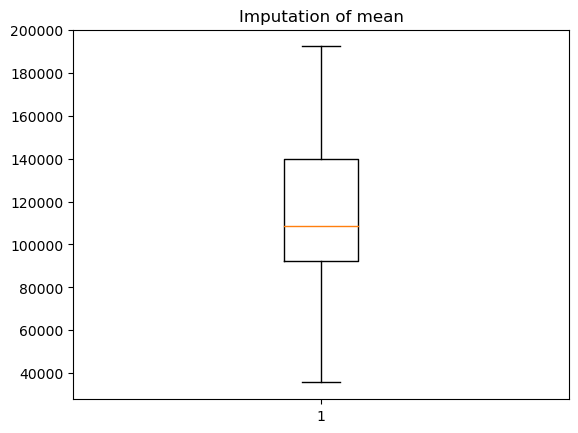

In [28]:
for i in df_mean["profit"]:
    Q1 = np.quantile(df_mean["profit"], 0.25)
    Q3 = np.quantile(df_mean["profit"], 0.75)
    median = np.median(df_mean["profit"])
    IQr = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
    
    if i>upper or i<lower:
        df_mean["profit"] = df_mean["profit"].replace(i, np.mean(df["profit"]))
        
plt.boxplot(df_mean["profit"])
plt.title("Imputation of mean")
plt.show()

In [29]:
mean_data = sm.ols("profit~RDS+admin+marketing", data= df_mean).fit()
mean_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.82e-24
Time:                        03:25:52   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RDS            0.7447      0.057     13.162      0.000       0.631       0.859
admin         -0.0144      0.064     -0.226      0.823      -0.143       0.114
marketing      0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

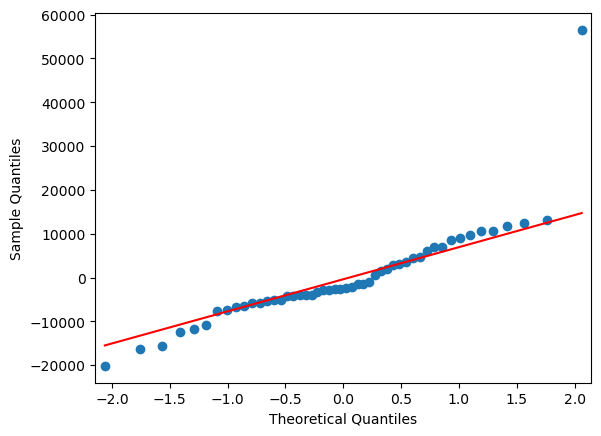

In [30]:
smf.qqplot(mean_data.resid, line='q')
plt.show()

Now conducting Shapiro-Wilk test to check the normality of the dataset after mean imputation.

In [31]:
print("RnD Spend(statistics and p_value)", shapiro(df_mean["RDS"]))
print("\nAdministration(statistics and p_value)", shapiro(df_mean["admin"]))
print("\nMarketing(statistics and p_value)", shapiro(df_mean["marketing"]))
print("\nProfit(statistics and p_value)", shapiro(df_mean["profit"]))

RnD Spend(statistics and p_value) ShapiroResult(statistic=0.9673415422439575, pvalue=0.18005383014678955)

Administration(statistics and p_value) ShapiroResult(statistic=0.9702357649803162, pvalue=0.23660743236541748)

Marketing(statistics and p_value) ShapiroResult(statistic=0.9743665456771851, pvalue=0.3450852632522583)

Profit(statistics and p_value) ShapiroResult(statistic=0.9794679880142212, pvalue=0.5297479033470154)


Here we can see that, p_value >0.05, we fail to reject Null Hypothesis.

Now measuring using original data:

In [32]:
original_data = sm.ols("profit~RDS+admin+marketing", data=df).fit()
original_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 12 May 2023   Prob (F-statistic):           4.53e-30
Time:                        03:25:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
original_data.rsquared

0.9507459940683246

In [34]:
original_data.rsquared_adj

0.9475337762901719

As we can see that the original data is also significantly giving the same same result as mean and median imputation.

Lets try to remove the outlier and see what result it posseses

In [35]:
df_rmv = df.copy()
def drop_outliers(data, x):
    IQR = 1.5 * (np.percentile(data[x], 75) - np.percentile(data[x], 25))
    data.drop(data[data[x] > (IQR + np.percentile(data[x], 75))].index, inplace=True)
    data.drop(data[data[x] < (IQR + np.percentile(data[x], 25))-IQR].index, inplace=True)
    

Text(0.5, 1.0, 'After removing outliers')

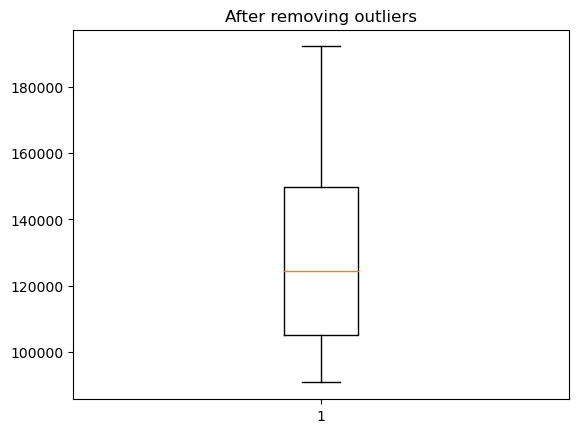

In [36]:
drop_outliers(df_rmv, "profit")
plt.boxplot(df_rmv["profit"])
plt.title("After removing outliers")

In [37]:
df_rmv["state"].value_counts()

Florida       14
New York      13
California    10
Name: state, dtype: int64

In [38]:
rmv_outliers = sm.ols("profit~RDS+admin+marketing", data=df_rmv).fit()
rmv_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.45e-20
Time:                        03:25:59   Log-Likelihood:                -380.96
No. Observations:                  37   AIC:                             769.9
Df Residuals:                      33   BIC:                             776.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.907e+04   8720.813      6.774      0.000    4.13e+04    7.68e+04
RDS            0.7661      0.048     15.865      0.000       0.668       0.864
admin         -0.0627      0.058     -1.080      0.288      -0.181       0.055
marketing      0.0261      0.016      1.652      0.108      -0.006       0.058
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.561
Skew:                          -0.110   Prob(JB):                        0.755
Kurtosis:                       2.438   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see in boxplot, removing outliers is giving the perfect normality for the data. So we are going with removed outliers DataSet to proceed with for futher prediction

EDA

In [39]:
import pylab

In [40]:
def plot_data(data, i):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[i].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[i], dist='norm', plot=pylab)

Text(0.5, 1.0, 'RnD Spend')

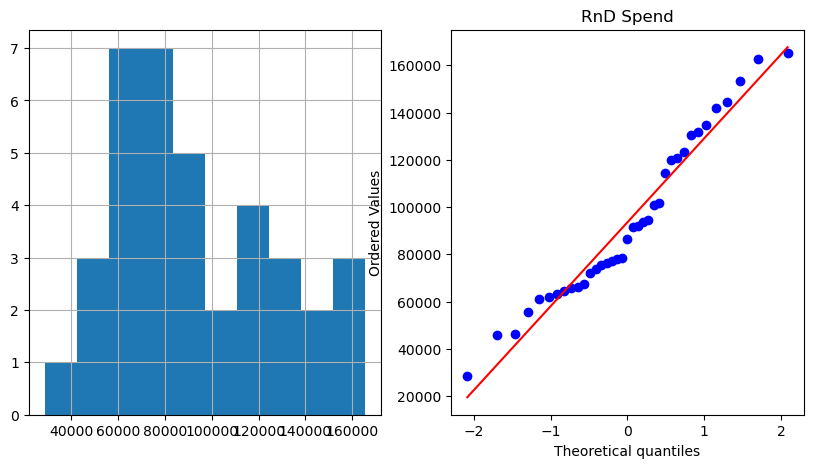

In [41]:
plot_data(df_rmv, 'RDS')
plt.title("RnD Spend")

Text(0.5, 1.0, 'Administration')

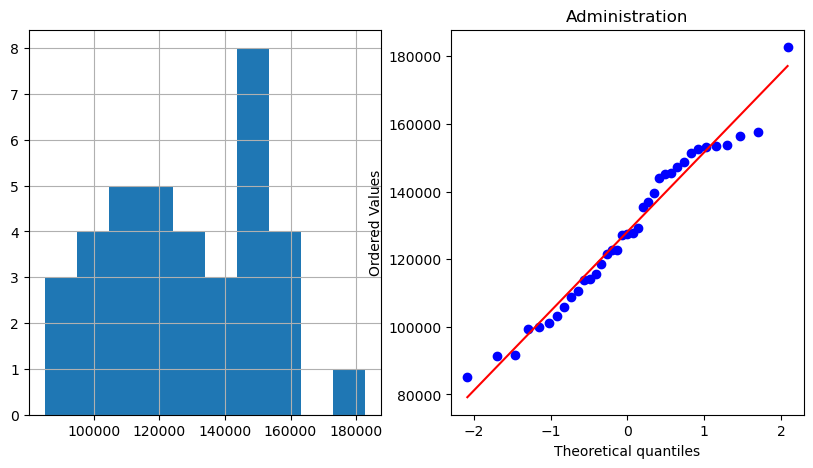

In [42]:
plot_data(df_rmv, "admin")
plt.title("Administration")

In [43]:
df_rmv.columns

Index(['RDS', 'admin', 'marketing', 'state', 'profit'], dtype='object')

Text(0.5, 1.0, 'Marketing')

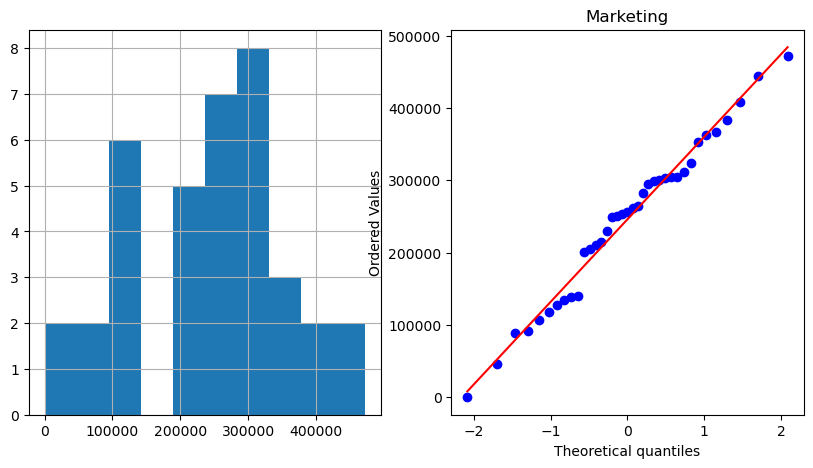

In [44]:
plot_data(df_rmv, "marketing")
plt.title("Marketing")


Text(0.5, 1.0, 'profit')

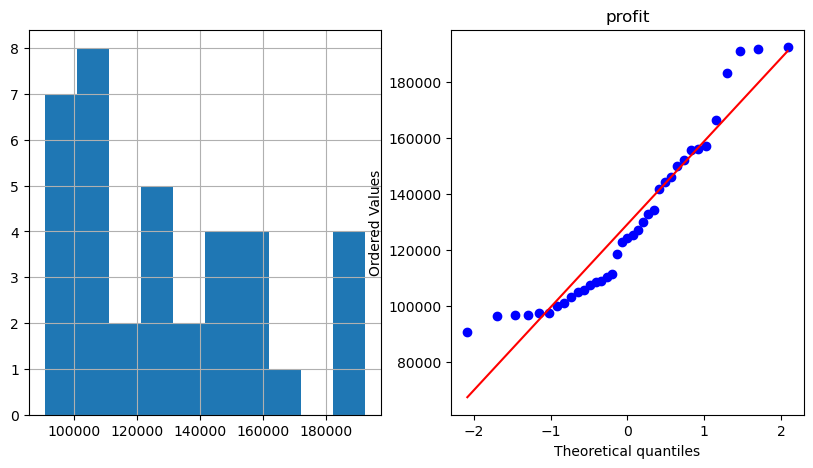

In [45]:
plot_data(df_rmv, "profit")
plt.title("profit")

Visualizing the dataset after square root transformation and betermine any possible changes in the distribution

In [46]:
df_sqrt = df_rmv.copy()
df_sqrt[continuous_features] = np.sqrt(df_sqrt[continuous_features])

Text(0.5, 1.0, 'RnD Spend')

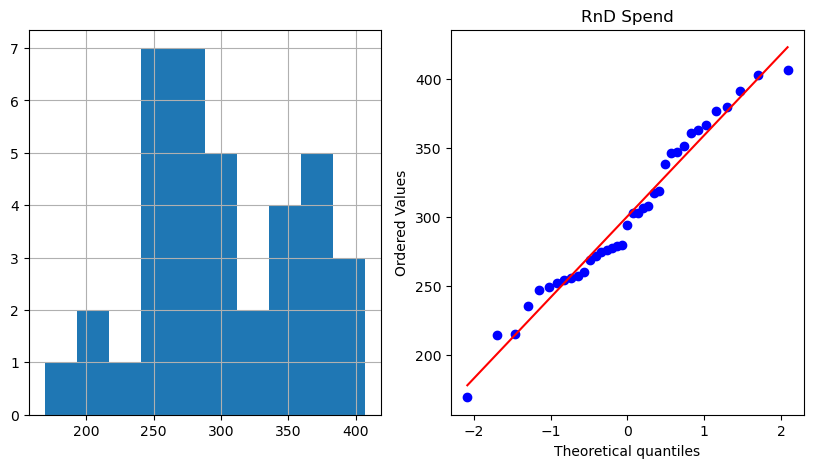

In [47]:
plot_data(df_sqrt, "RDS")
plt.title("RnD Spend")

Text(0.5, 1.0, 'Administration')

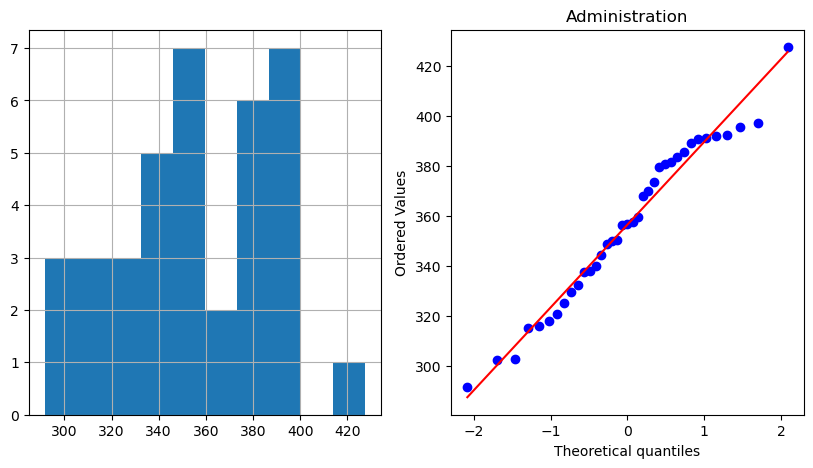

In [48]:
plot_data(df_sqrt, "admin")
plt.title("Administration")

Text(0.5, 1.0, 'marketing')

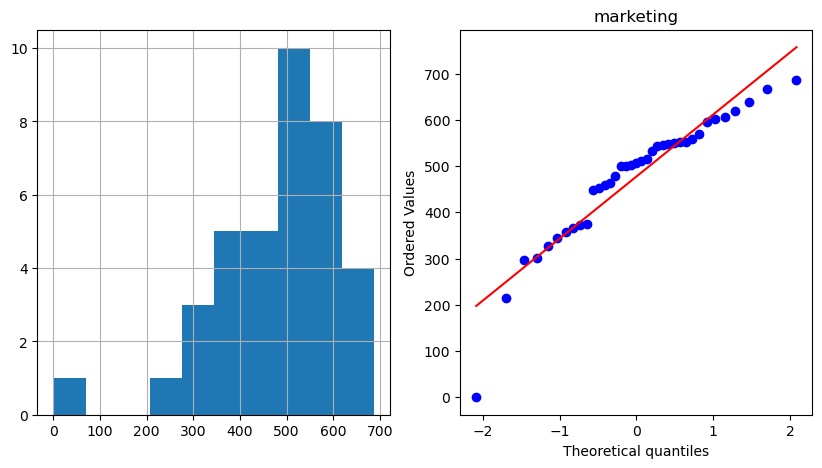

In [49]:
plot_data(df_sqrt, "marketing")
plt.title("marketing")

Text(0.5, 1.0, 'Profit')

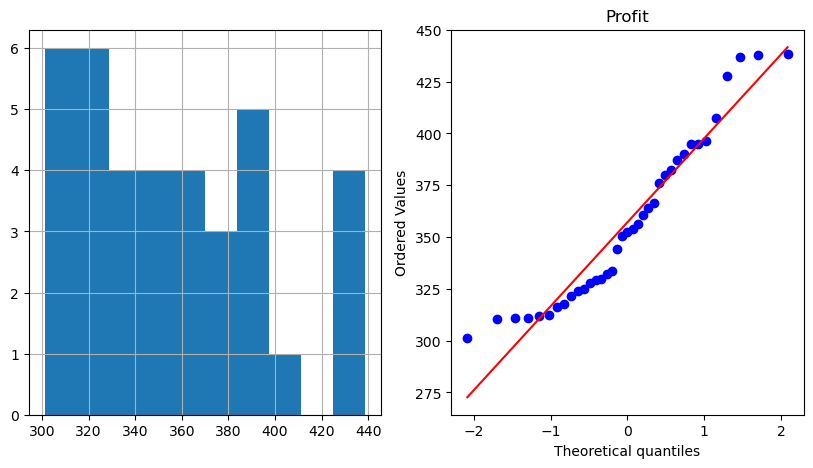

In [50]:
plot_data(df_sqrt, "profit")
plt.title("Profit")

Visualizing the dataset after cube root transformation and betermine any possible changes in the distribution

In [51]:
df_cbrt = df_rmv.copy()
df_cbrt[continuous_features] = np.cbrt(df[continuous_features])

Text(0.5, 1.0, 'Profit')

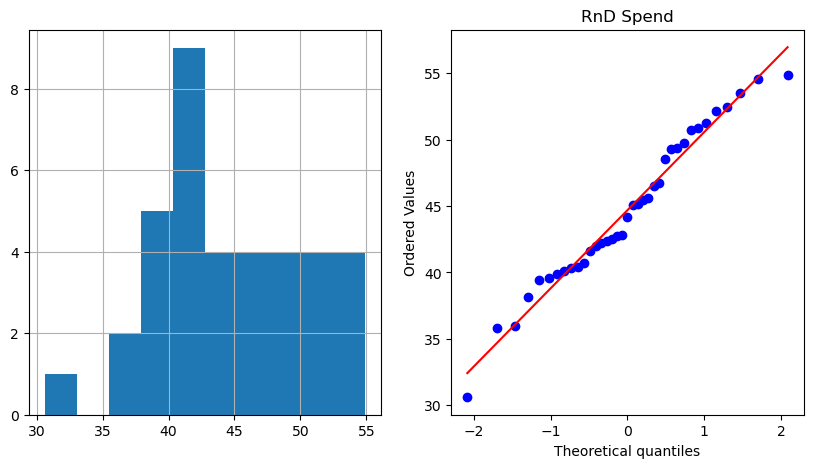

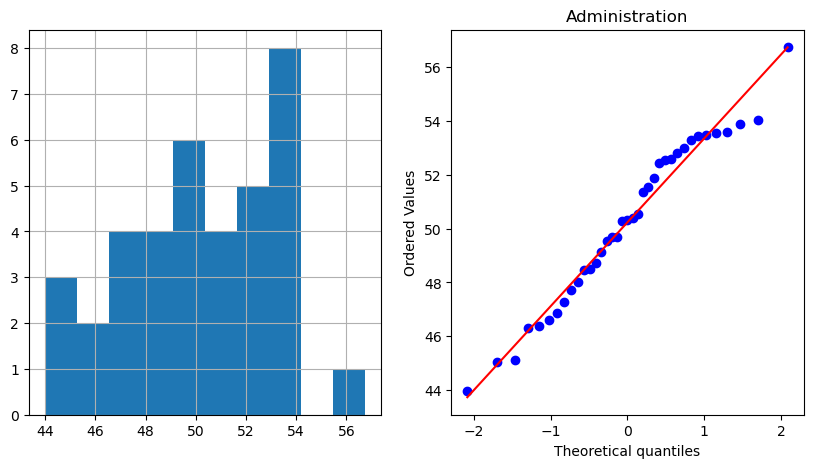

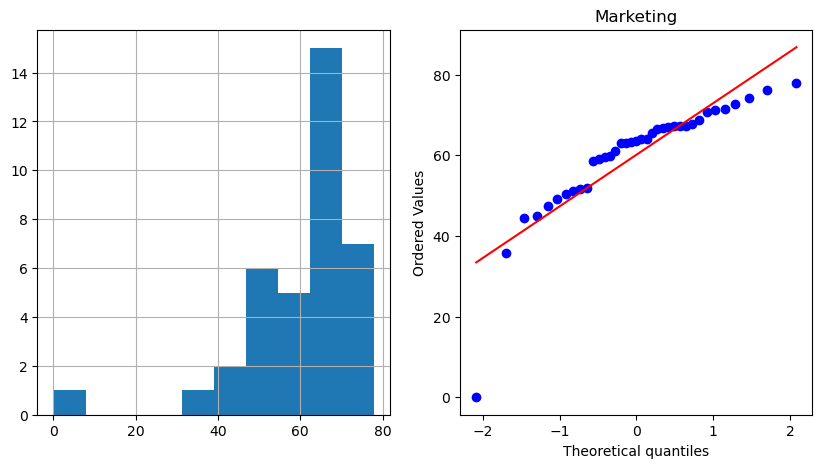

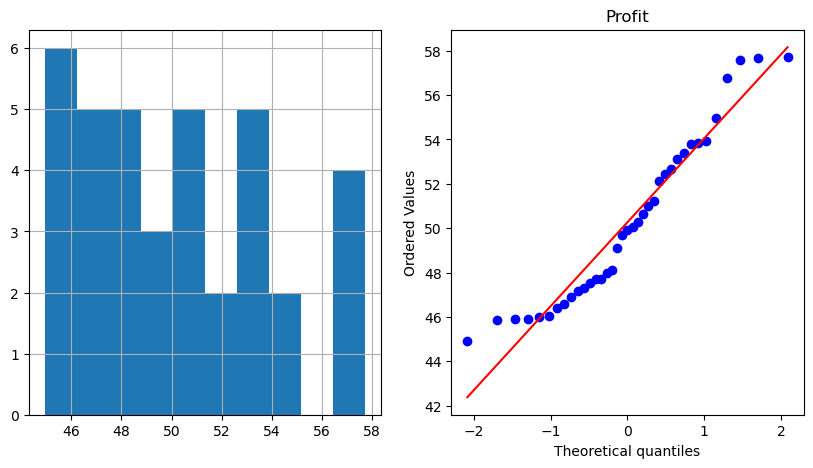

In [52]:
plot_data(df_cbrt, "RDS")
plt.title("RnD Spend")

plot_data(df_cbrt, "admin")
plt.title("Administration")

plot_data(df_cbrt, "marketing")
plt.title("Marketing")

plot_data(df_cbrt, "profit")
plt.title("Profit")

In [53]:
df_rmv["state"].value_counts()

Florida       14
New York      13
California    10
Name: state, dtype: int64

Now conducting Shapiro-Wilk test to check the normality of the removed outlier dataset.

In [54]:
df_rmv.columns

Index(['RDS', 'admin', 'marketing', 'state', 'profit'], dtype='object')

In [55]:
print("RnD Spend(statistics and p_value)", shapiro(df_rmv["RDS"]))
print("\nAdministration(statistics and p_value)", shapiro(df_rmv["admin"]))
print("\nMarketing(statistics and p_value)", shapiro(df_rmv["marketing"]))
print("\nProfit(statistics and p_value)", shapiro(df_rmv["profit"]))

RnD Spend(statistics and p_value) ShapiroResult(statistic=0.9542776346206665, pvalue=0.13254840672016144)

Administration(statistics and p_value) ShapiroResult(statistic=0.9711195230484009, pvalue=0.43953269720077515)

Marketing(statistics and p_value) ShapiroResult(statistic=0.9814736843109131, pvalue=0.7816449403762817)

Profit(statistics and p_value) ShapiroResult(statistic=0.9067625999450684, pvalue=0.004568296018987894)


Here we can see that p_value (for profit) < 0.05, so we fail to null hypothesis i.e. we assume the distribution of our variable is not normal/gaussian.

Conclusion:  We performing various transformation, outliers treatment and Normality(Hypothisis Testing) test we came into conclusion that Mean Imputation in Outliers gives the good Normality.

We can take mean imputed data for the futher predictions

In [56]:
df_mean.columns

Index(['RDS', 'admin', 'marketing', 'state', 'profit'], dtype='object')

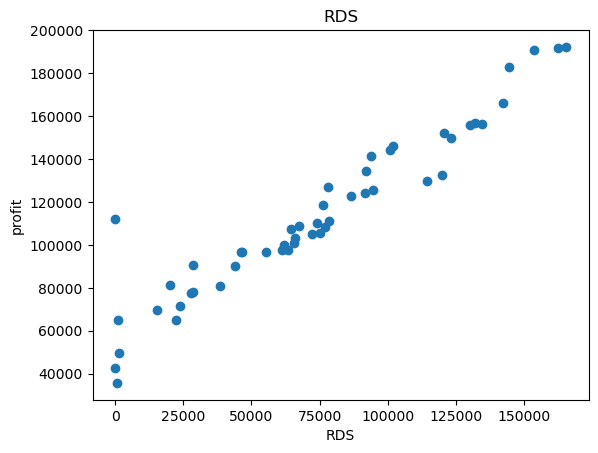

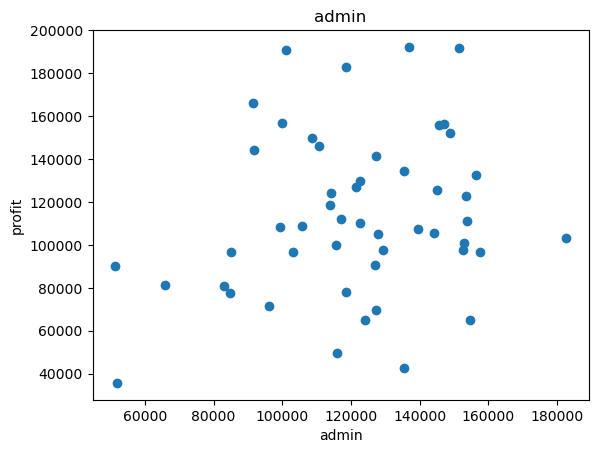

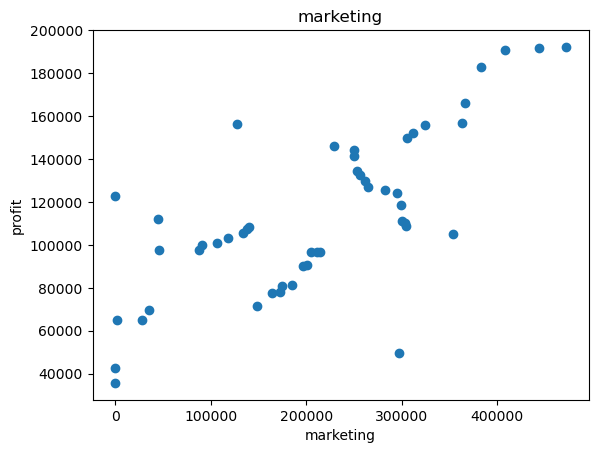

In [57]:
for i in continuous_features:
    if i != 'profit':
        data = df_mean.copy()
        plt.scatter(data[i], data["profit"])
        plt.xlabel(i)
        plt.ylabel("profit")
        plt.title(i)
        plt.show()

RnD Spend is having good linearity relation with Profit

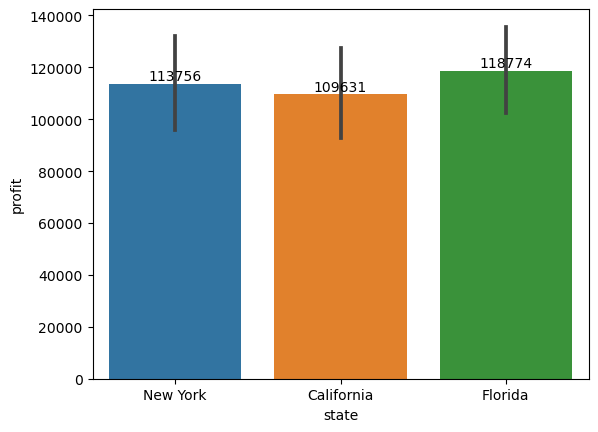

In [58]:
ax = sns.barplot(x="state", y="profit", data=df_mean)
for i in ax.containers:
    ax.bar_label(i)

There is not much significant difference in the distribution of each states about the profit generation and there is not any direction relation

<b> We are going to drop State Feature to build the model as we cannpt find any relevant features for our inferences

In [59]:
df1 = df_mean.drop("state", axis=1)
df1.head()

,RDS,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Checking the correlation

In [60]:
df1.corr()

,RDS,admin,marketing,profit
RDS,1.000000,0.241955,0.724248,0.953493
admin,0.241955,1.000000,-0.032154,0.205950
marketing,0.724248,-0.032154,1.000000,0.726445
profit,0.953493,0.205950,0.726445,1.000000


<AxesSubplot:>

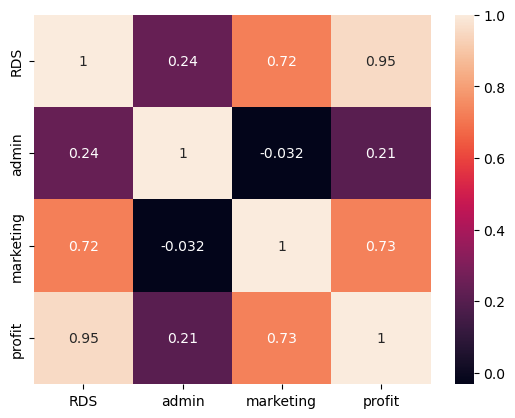

In [61]:
sns.heatmap(df1.corr(), annot=True)

Plotting the Pair Plot

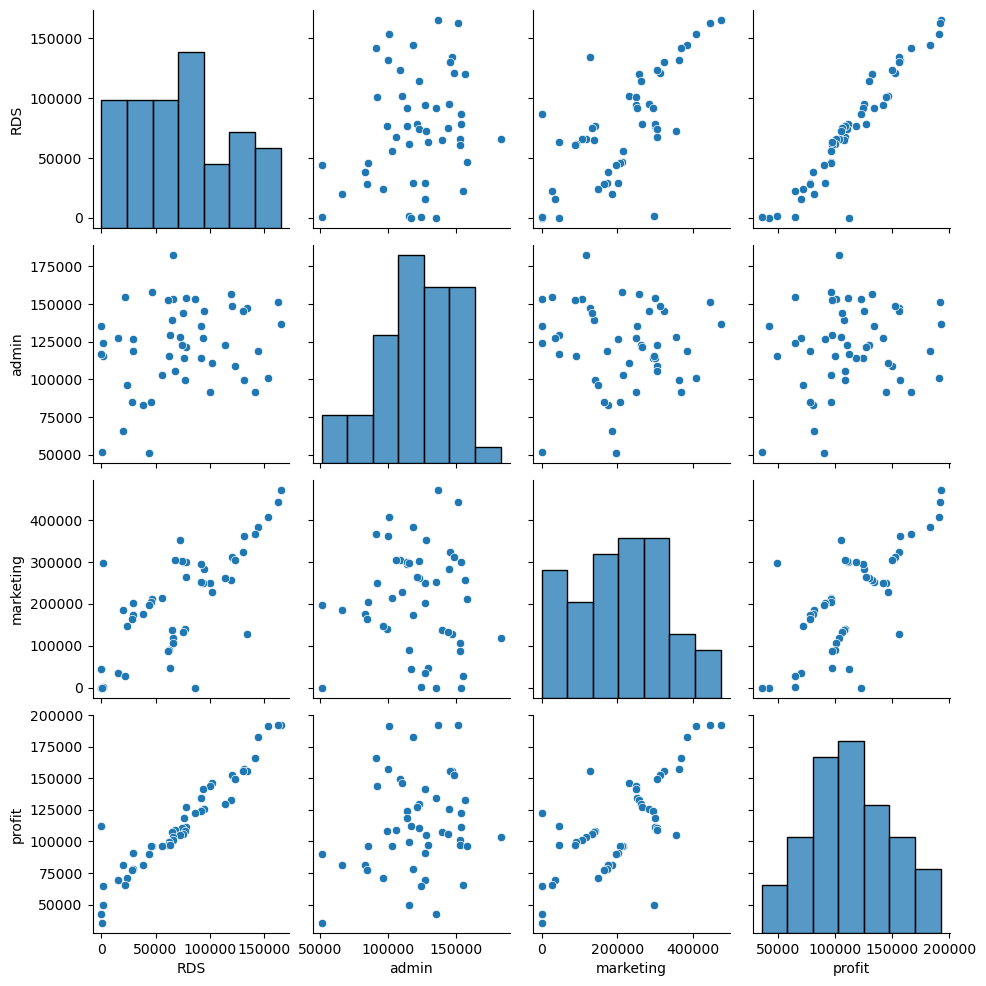

In [62]:
sns.pairplot(df1)

We can see that, RnD Spend is having highest correlation and linear relation with Profit.

Feature Engineering

Applying Standard Scaler

In [63]:
df_stdsc = df1.copy()

In [64]:
features = df_stdsc[continuous_features]

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
df_stdsc[continuous_features] = scaler.fit_transform(features.values)
df_stdsc.head()

,RDS,admin,marketing,profit
0,2.016411,0.560753,2.153943,2.093592
1,1.955860,1.082807,1.923600,2.081032
2,1.754364,-0.728257,1.626528,2.061201
3,1.554784,-0.096365,1.422210,1.843336
4,1.504937,-1.079919,1.281528,1.396449


Preparing the Model

In [67]:
import statsmodels.formula.api as sm

In [68]:
model = sm.ols("profit~RDS+admin+marketing", data = df_stdsc).fit()

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.82e-24
Time:                        03:26:25   Log-Likelihood:                -10.200
No. Observations:                  50   AIC:                             28.40
Df Residuals:                      46   BIC:                             36.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.829e-16      0.044  -1.33e-14      1.000      -0.088       0.088
RDS            0.9048      0.069     13.162      0.000       0.766       1.043
admin         -0.0107      0.047     -0.226      0.823      -0.106       0.085
marketing      0.0708      0.067      1.061      0.294      -0.064       0.205
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Model Testing


In [70]:
model.params

Intercept   -5.828671e-16
RDS          9.048069e-01
admin       -1.069639e-02
marketing    7.079636e-02
dtype: float64

In [71]:
display(np.round(model.tvalues,3))

Intercept    -0.000
RDS          13.162
admin        -0.226
marketing     1.061
dtype: float64

In [72]:
display(np.round(model.pvalues, 3))

Intercept    1.000
RDS          0.000
admin        0.823
marketing    0.294
dtype: float64

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. <br>

<b> We know that: y = M1X1 + M2X2 + M3X3 + ..... + MnXn </b> <br>
where y = dependent variable <br>
      X1, X2,....,Xn = multiple independent varible <br>
      M1, M2,....,Mn = slope wrt to independent variable to x-axis

Now we are going to perform Simple Linear Regression seperately to check the dependency between those feature with Target Variables <br> <br>
Comparing the models by their R-Squared and p_values

In [73]:
df_stdsc.columns

Index(['RDS', 'admin', 'marketing', 'profit'], dtype='object')

In [74]:
admin_model = sm.ols("profit~admin", data=df_stdsc).fit()

In [75]:
admin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.126
Date:                Fri, 12 May 2023   Prob (F-statistic):              0.151
Time:                        03:26:30   Log-Likelihood:                -69.863
No. Observations:                  50   AIC:                             143.7
Df Residuals:                      48   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.141  -4.08e-15      1.000      -0.284       0.284
admin          0.2060      0.141      1.458      0.151      -0.078       0.490
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.020
Skew:                           0.315   Prob(JB):                        0.600
Kurtosis:                       2.694   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
display(np.round(admin_model.tvalues, 3))

display(np.round(admin_model.pvalues, 3))

Intercept   -0.000
admin        1.458
dtype: float64

Intercept    1.000
admin        0.151
dtype: float64

In [77]:
market_model = sm.ols("profit~marketing", data = df_stdsc).fit()

In [78]:
market_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     53.64
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.35e-09
Time:                        03:26:32   Log-Likelihood:                -52.192
No. Observations:                  50   AIC:                             108.4
Df Residuals:                      48   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.099  -5.81e-15      1.000      -0.199       0.199
marketing      0.7264      0.099      7.324      0.000       0.527       0.926
==============================================================================
Omnibus:                        3.667   Durbin-Watson:                   1.153
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                2.853
Skew:                          -0.314   Prob(JB):                        0.240
Kurtosis:                       3.987   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
display(np.round(market_model.tvalues, 3))

display(np.round(market_model.pvalues, 3))

Intercept   -0.000
marketing    7.324
dtype: float64

Intercept    1.0
marketing    0.0
dtype: float64

In [80]:
admin_market_model = sm.ols("profit~admin+marketing", data=df_stdsc).fit()
admin_market_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     32.50
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.37e-09
Time:                        03:26:33   Log-Likelihood:                -49.238
No. Observations:                  50   AIC:                             104.5
Df Residuals:                      47   BIC:                             110.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.094   -6.1e-15      1.000      -0.190       0.190
admin          0.2295      0.095      2.428      0.019       0.039       0.420
marketing      0.7338      0.095      7.762      0.000       0.544       0.924
==============================================================================
Omnibus:                        5.352   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.990
Skew:                          -0.417   Prob(JB):                       0.0825
Kurtosis:                       4.304   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculating Variance Inflation Factor (VIF)

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df1[["marketing", "admin", "RDS"]]
vif_data = pd.DataFrame()
vif_data["Features"] = x.columns
vif_data["VIF"] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by=["VIF"])

,Features,VIF
1,admin,4.026406
0,marketing,7.593984
2,RDS,8.384571


In [82]:
x = df1[["marketing", "RDS"]]
vif_data = pd.DataFrame()
vif_data["Features"] = x.columns
vif_data["VIF"] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by=["VIF"])

,Features,VIF
0,marketing,7.156216
1,RDS,7.156216


some variables has vif>5, which says there is dome colinearlity, hence we cannot consider all the variables in Regression Equation

This test is not giving much information to come up to any conclusion

Lets build model in which each of the feature will not be present and then we will come to a conclusion to remove which of the feature by comparing the model parameters

In [83]:
admin_new_model = sm.ols("profit~RDS+admin", data=df_stdsc).fit()
admin_new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     237.0
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.80e-25
Time:                        03:26:40   Log-Likelihood:                -10.804
No. Observations:                  50   AIC:                             27.61
Df Residuals:                      47   BIC:                             33.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.044  -1.31e-14      1.000      -0.088       0.088
RDS            0.9599      0.045     21.259      0.000       0.869       1.051
admin         -0.0263      0.045     -0.582      0.563      -0.117       0.065
==============================================================================
Omnibus:                       47.122   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.374
Skew:                           2.293   Prob(JB):                     6.44e-58
Kurtosis:                      13.266   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


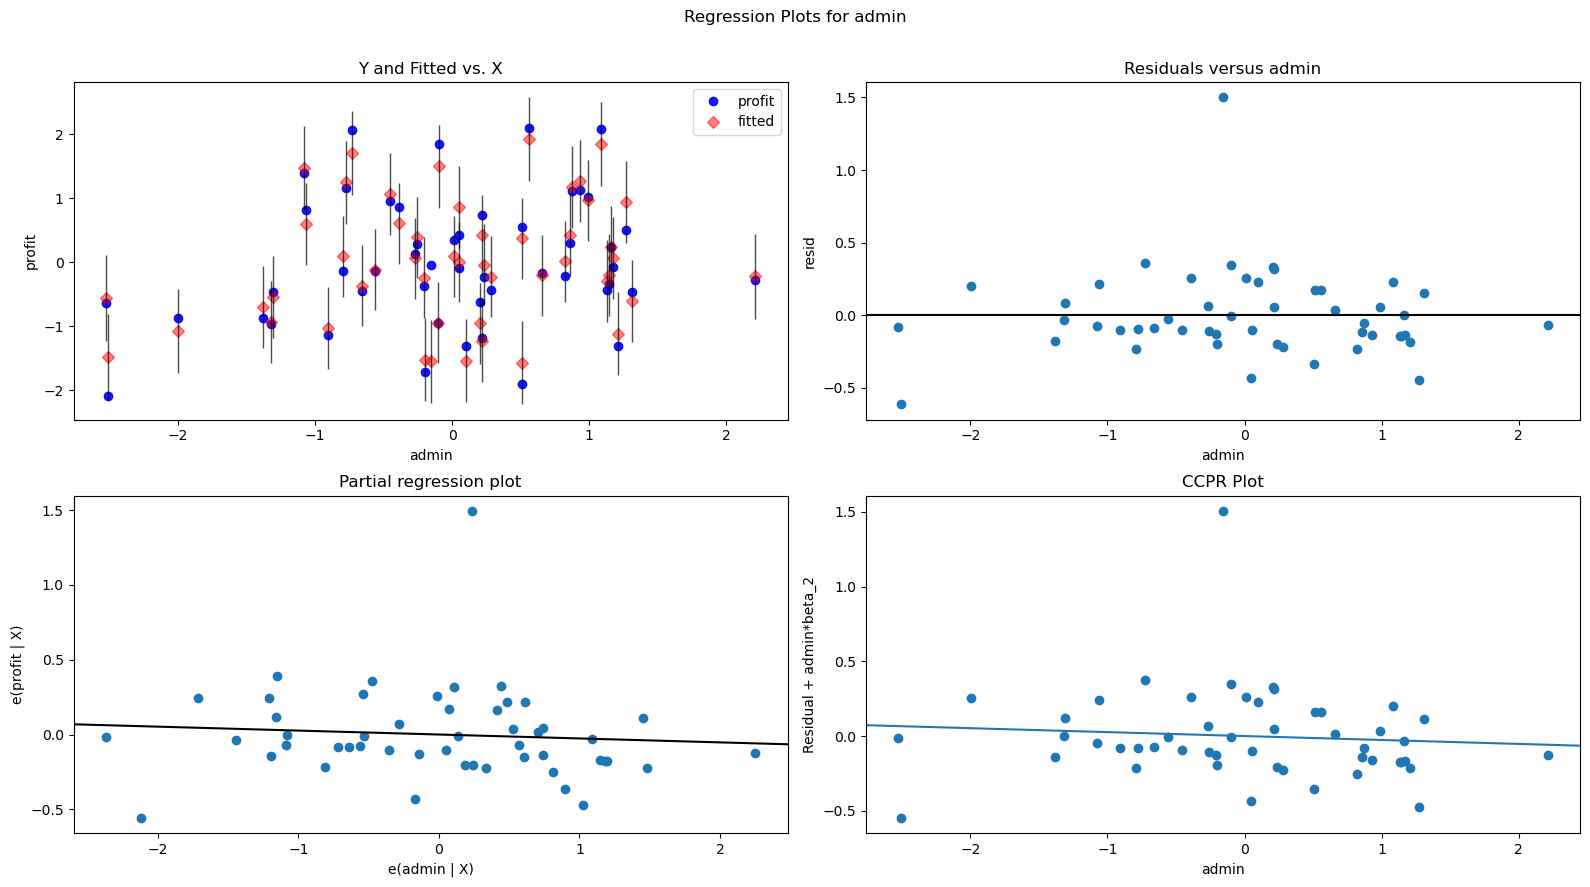

In [84]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(admin_new_model, "admin", fig=fig)
plt.show()

In [85]:
market_new_model = sm.ols("profit~RDS+marketing", data=df_stdsc).fit()
market_new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     243.1
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.63e-25
Time:                        03:26:41   Log-Likelihood:                -10.227
No. Observations:                  50   AIC:                             26.45
Df Residuals:                      47   BIC:                             32.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.043  -1.33e-14      1.000      -0.087       0.087
RDS            0.8988      0.063     14.312      0.000       0.772       1.025
marketing      0.0755      0.063      1.202      0.236      -0.051       0.202
==============================================================================
Omnibus:                       50.200   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.865
Skew:                           2.464   Prob(JB):                     1.71e-66
Kurtosis:                      14.004   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


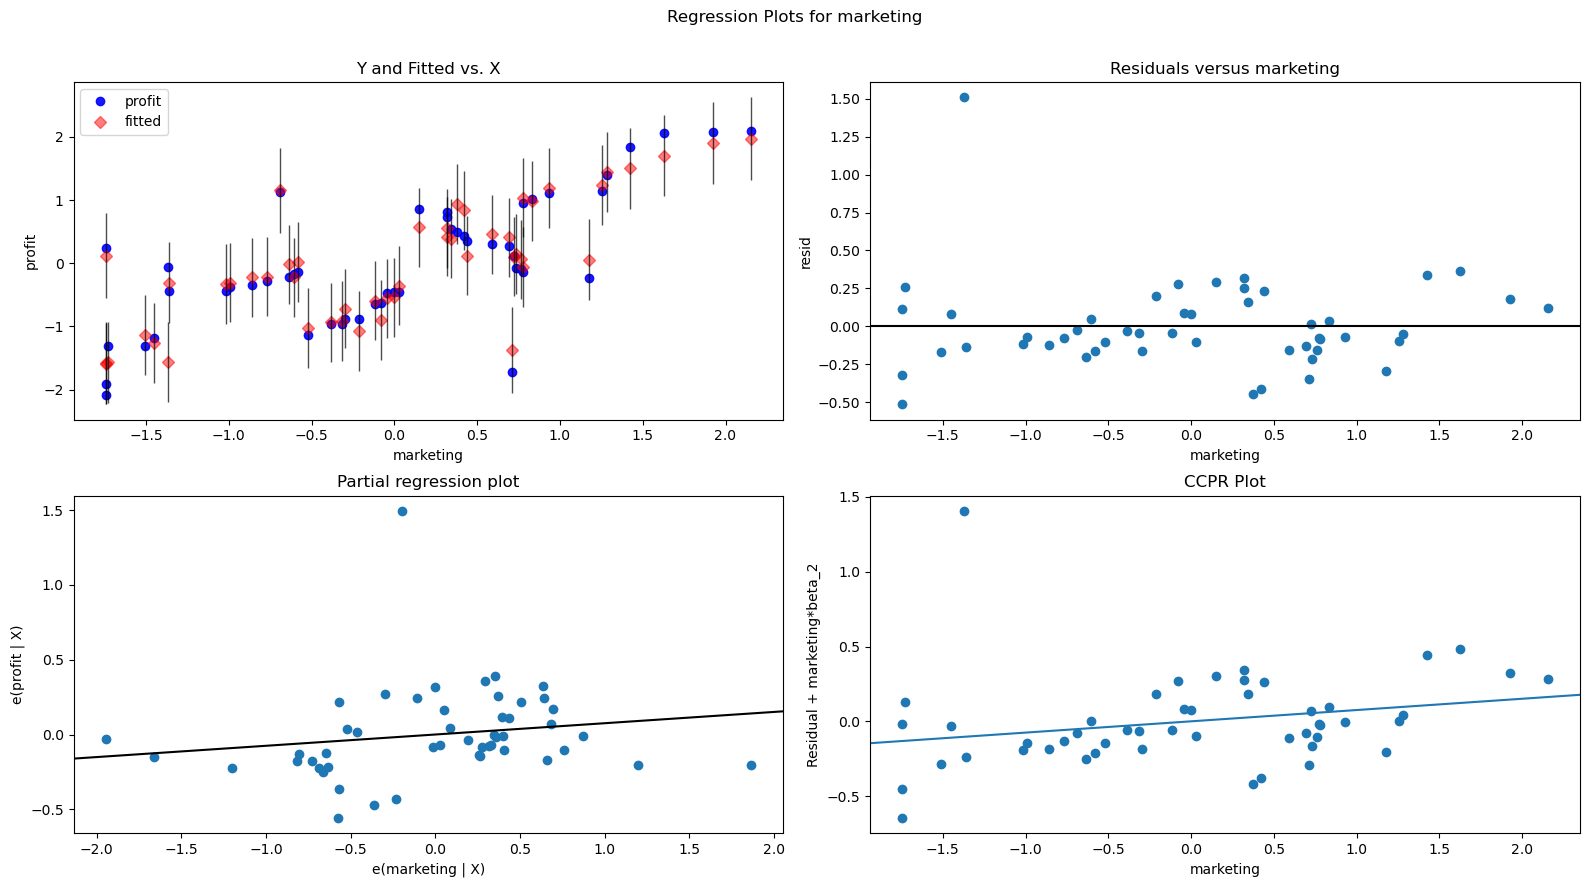

In [86]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(market_new_model, "marketing", fig=fig)
plt.show()

In [87]:
rds_model = sm.ols("profit~RDS", data=df_stdsc).fit()
rds_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     480.3
Date:                Fri, 12 May 2023   Prob (F-statistic):           1.20e-26
Time:                        03:26:42   Log-Likelihood:                -10.984
No. Observations:                  50   AIC:                             25.97
Df Residuals:                      48   BIC:                             29.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.759e-16      0.044  -1.32e-14      1.000      -0.087       0.087
RDS            0.9535      0.044     21.917      0.000       0.866       1.041
==============================================================================
Omnibus:                       46.253   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.155
Skew:                           2.269   Prob(JB):                     9.60e-54
Kurtosis:                      12.829   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


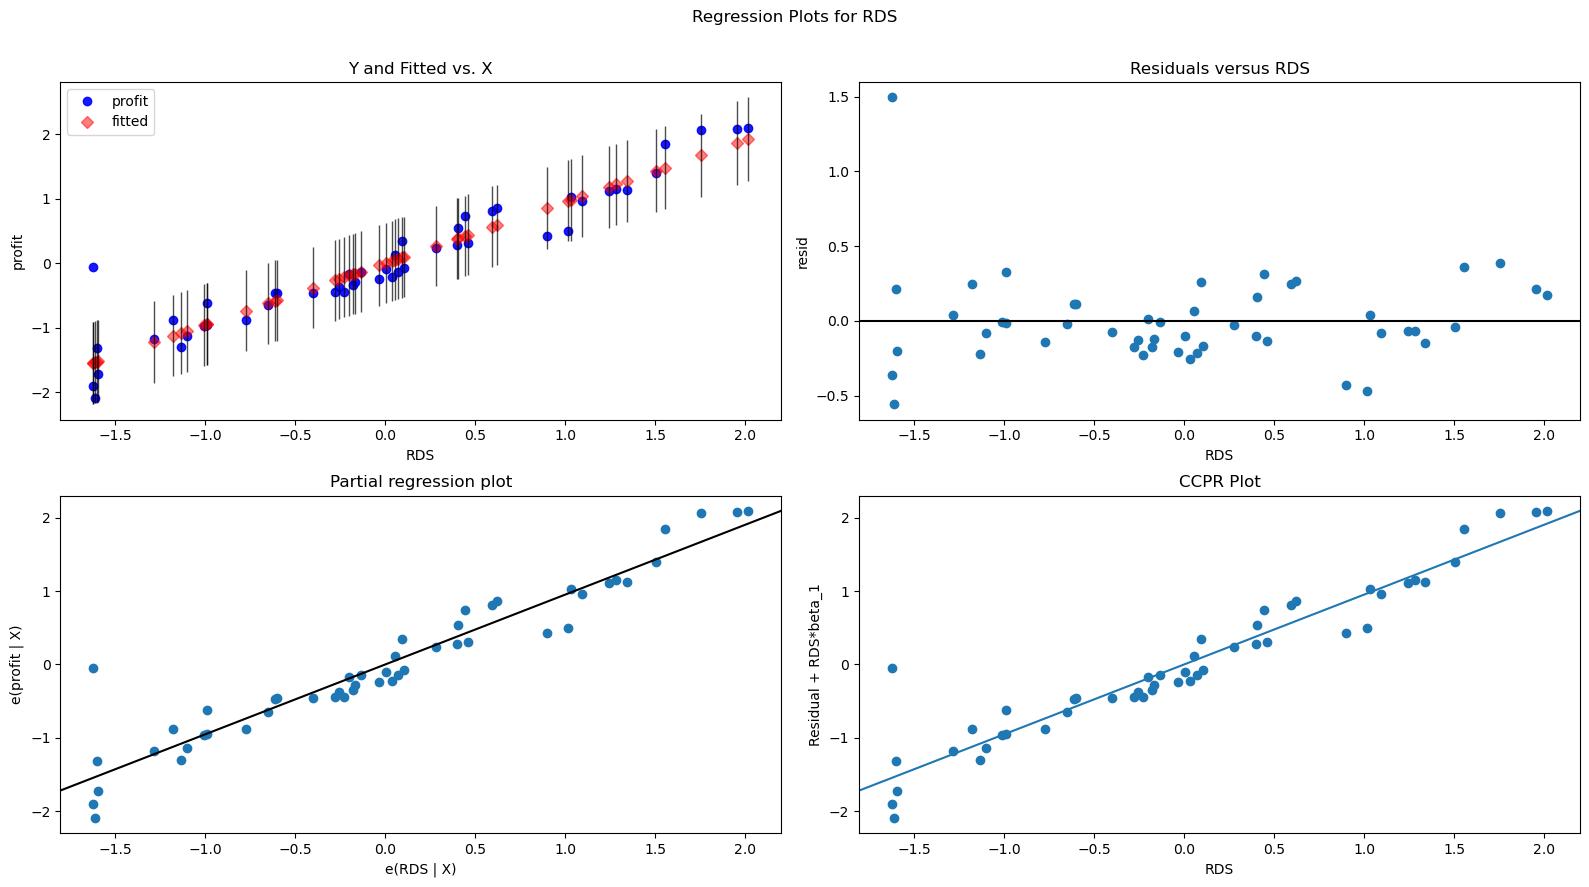

In [88]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(rds_model, "RDS", fig=fig)
plt.show()

Lets see the Residuals of both the models to get some conclusion

Model Validation

Analysing the mean squared error(MSE) or root mean square error(RMSE) 

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
df.columns

Index(['RDS', 'admin', 'marketing', 'state', 'profit'], dtype='object')

Including All Features

In [91]:
x = df1.drop("profit", axis=1).values
y = df1["profit"].values.reshape(-1,1)

In [92]:
x

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [93]:
y

array([[192261.83  ],
       [191792.06  ],
       [191050.39  ],
       [182901.99  ],
       [166187.94  ],
       [156991.12  ],
       [156122.51  ],
       [155752.6   ],
       [152211.77  ],
       [149759.96  ],
       [146121.95  ],
       [144259.4   ],
       [141585.52  ],
       [134307.35  ],
       [132602.65  ],
       [129917.04  ],
       [126992.93  ],
       [125370.37  ],
       [124266.9   ],
       [122776.86  ],
       [118474.03  ],
       [111313.02  ],
       [110352.25  ],
       [108733.99  ],
       [108552.04  ],
       [107404.34  ],
       [105733.54  ],
       [105008.31  ],
       [103282.38  ],
       [101004.64  ],
       [ 99937.59  ],
       [ 97483.56  ],
       [ 97427.84  ],
       [ 96778.92  ],
       [ 96712.8   ],
       [ 96479.51  ],
       [ 90708.19  ],
       [ 89949.14  ],
       [ 81229.06  ],
       [ 81005.76  ],
       [ 78239.91  ],
       [ 77798.83  ],
       [ 71498.49  ],
       [ 69758.98  ],
       [ 65200.33  ],
       [ 6

In [94]:
x.shape

(50, 3)

In [95]:
y.shape

(50, 1)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 3)
(13, 3)
(37, 1)
(13, 1)


In [97]:
transform_x = StandardScaler().fit(x_train)
transform_y = StandardScaler().fit(y_train)

x_train_scale = transform_x.transform(x_train)
x_test_scale = transform_x.transform(x_test)
y_train_scale = transform_y.transform(y_train)
y_test_scale = transform_y.transform(y_test)

In [98]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scale, y_train_scale)

LinearRegression()

In [99]:
X_test_scaled = transform_x.transform(x_test)
prediction = linear_regressor.predict(X_test_scaled)
prediction_unscaled = transform_y.inverse_transform(prediction)

In [100]:
from sklearn.metrics import r2_score
cv_linear = cross_val_score(estimator=linear_regressor, X=x_train_scale, y=y_train_scale)

y_pred_linear_train = linear_regressor.predict(x_train_scale)

r2_score_train = r2_score(y_train_scale, y_pred_linear_train)

In [101]:
y_pred_linear_test = linear_regressor.predict(x_test_scale)
r2_score_test = r2_score(y_test_scale, y_pred_linear_test)

In [102]:
rmse_linear_allfeatures = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print("R2 score of train: ", r2_score_train)
print("R2 score of test: ", r2_score_test)
print("RMSE of all featues: ", rmse_linear_allfeatures)

CV:  0.9438693894625712
R2 score of train:  0.9610315732944692
R2 score of test:  0.7427361637606489
RMSE of all featues:  19449.921201144127


Using RnD Services and Marketing

In [103]:
df1.head(2)

,RDS,admin,marketing,profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [104]:
x = df1.drop(["profit","admin"], axis=1).values
y = df1["profit"].values.reshape(-1,1)

In [105]:
x[:5]

array([[165349.2 , 471784.1 ],
       [162597.7 , 443898.53],
       [153441.51, 407934.54],
       [144372.41, 383199.62],
       [142107.34, 366168.42]])

In [106]:
y[:5]

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94]])

In [107]:
print(x.shape)
print(y.shape)

(50, 2)
(50, 1)


In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 2)
(13, 2)
(37, 1)
(13, 1)


In [109]:
transform_x = StandardScaler().fit(x_train)
transform_y = StandardScaler().fit(y_train)

x_train_scale = transform_x.transform(x_train)
x_test_scale = transform_x.transform(x_test)
y_train_scale = transform_y.transform(y_train)
y_test_scale = transform_y.transform(y_test)

In [110]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scale, y_train_scale)

LinearRegression()

In [111]:
X_test_scaled = transform_x.transform(x_test)
prediction = linear_regressor.predict(X_test_scaled)
prediction_unscaled = transform_y.inverse_transform(prediction)

In [112]:
X_test_scaled = transform_x.transform(x_test)
prediction = linear_regressor.predict(X_test_scaled)
prediction_unscaled = transform_y.inverse_transform(prediction)

In [113]:
y_pred_linear_test = linear_regressor.predict(x_test_scale)
r2_score_test = r2_score(y_test_scale, y_pred_linear_test)

In [114]:
rmse_linear_rnd_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print("R2 score of train: ", r2_score_train)
print("R2 score of test: ", r2_score_test)
print("RMSE RnD Services and Marketing ", rmse_linear_rnd_marketing)

CV:  0.9438693894625712
R2 score of train:  0.9610315732944692
R2 score of test:  0.7440618421555414
RMSE RnD Services and Marketing  19399.743836191297


Using only RnD Services

In [115]:
df1.head()

,RDS,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [116]:
x = df1.drop(["profit", "admin", "marketing"], axis=1).values
y = df1["profit"].values.reshape(-1,1)

In [117]:
x[:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [118]:
y[:5]

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94]])

In [119]:
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 1)
(13, 1)
(37, 1)
(13, 1)


In [121]:
transform_x = StandardScaler().fit(x_train)
transform_y = StandardScaler().fit(y_train)

x_train_scale = transform_x.transform(x_train)
x_test_scale = transform_x.transform(x_test)
y_train_scale = transform_y.transform(y_train)
y_test_scale = transform_y.transform(y_test)

In [122]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train_scale, y_train_scale)

LinearRegression()

In [123]:
X_test_scaled = transform_x.transform(x_test)
prediction = linear_regressor.predict(X_test_scaled)
prediction_unscaled = transform_y.inverse_transform(prediction)

In [124]:
y_pred_linear_test = linear_regressor.predict(x_test_scale)
r2_score_test = r2_score(y_test_scale, y_pred_linear_test)

In [125]:
rmse_linear_rnd = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print("R2 score of train: ", r2_score_train)
print("R2 score of test: ", r2_score_test)
print("RMSE RnD Services: ", rmse_linear_rnd)

CV:  0.9438693894625712
R2 score of train:  0.9610315732944692
R2 score of test:  0.7459288106702828
RMSE RnD Services:  19328.857565118335


Lets compare the RMSE and check for the minimum values

In [126]:
rmse_compare = {"All Features Model": rmse_linear_allfeatures, "Rnd and Marketing":rmse_linear_rnd_marketing, "RnD Services":rmse_linear_rnd}
min(rmse_compare, key=rmse_compare.get)

'RnD Services'

So, we will include all the features because it is giving minimum RMSE value

In [127]:
final_model = sm.ols("profit~RDS+admin+marketing", data=df_stdsc).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Fri, 12 May 2023   Prob (F-statistic):           2.82e-24
Time:                        03:27:11   Log-Likelihood:                -10.200
No. Observations:                  50   AIC:                             28.40
Df Residuals:                      46   BIC:                             36.05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.829e-16      0.044  -1.33e-14      1.000      -0.088       0.088
RDS            0.9048      0.069     13.162      0.000       0.766       1.043
admin         -0.0107      0.047     -0.226      0.823      -0.106       0.085
marketing      0.0708      0.067      1.061      0.294      -0.064       0.205
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Residual Analysis

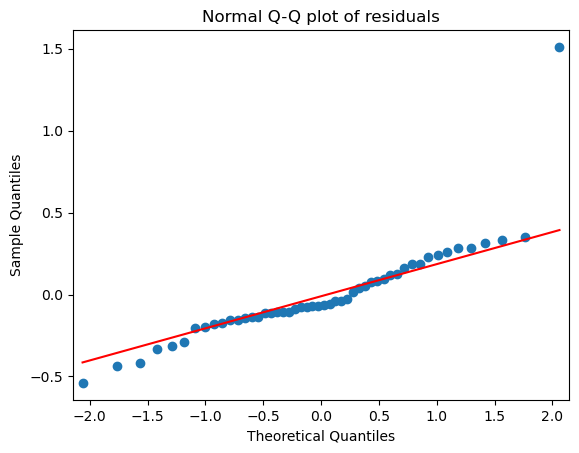

In [128]:
smf.qqplot(final_model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [129]:
def get_standard_values(val):
    return (val-val.mean())/val.std()

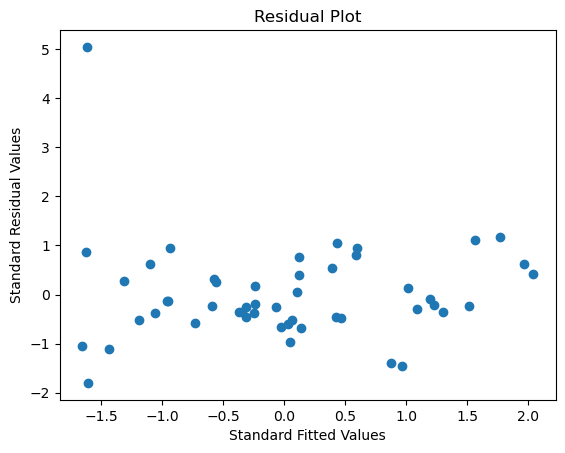

In [130]:
plt.scatter(get_standard_values(final_model.fittedvalues), get_standard_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standard Fitted Values')
plt.ylabel('Standard Residual Values')
plt.show()

eval_env: 1


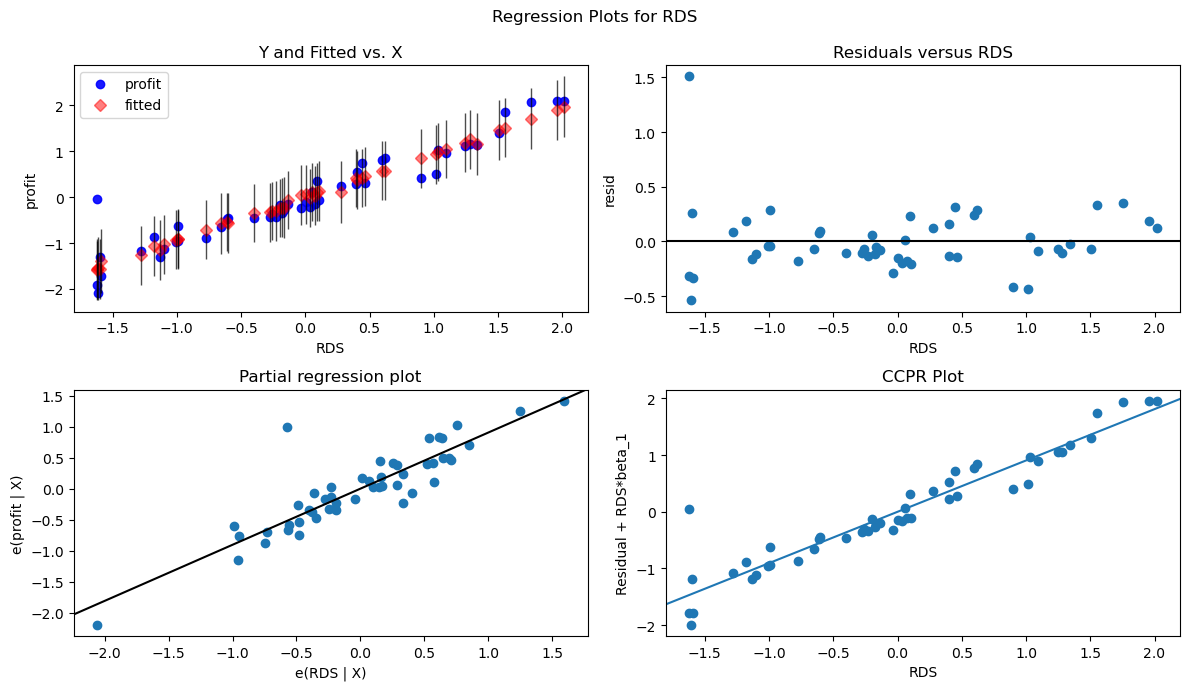

In [131]:
fig = plt.figure(figsize=(12,7))
plot_rds = smf.graphics.plot_regress_exog(final_model, "RDS", fig=fig)
plt.show()

eval_env: 1


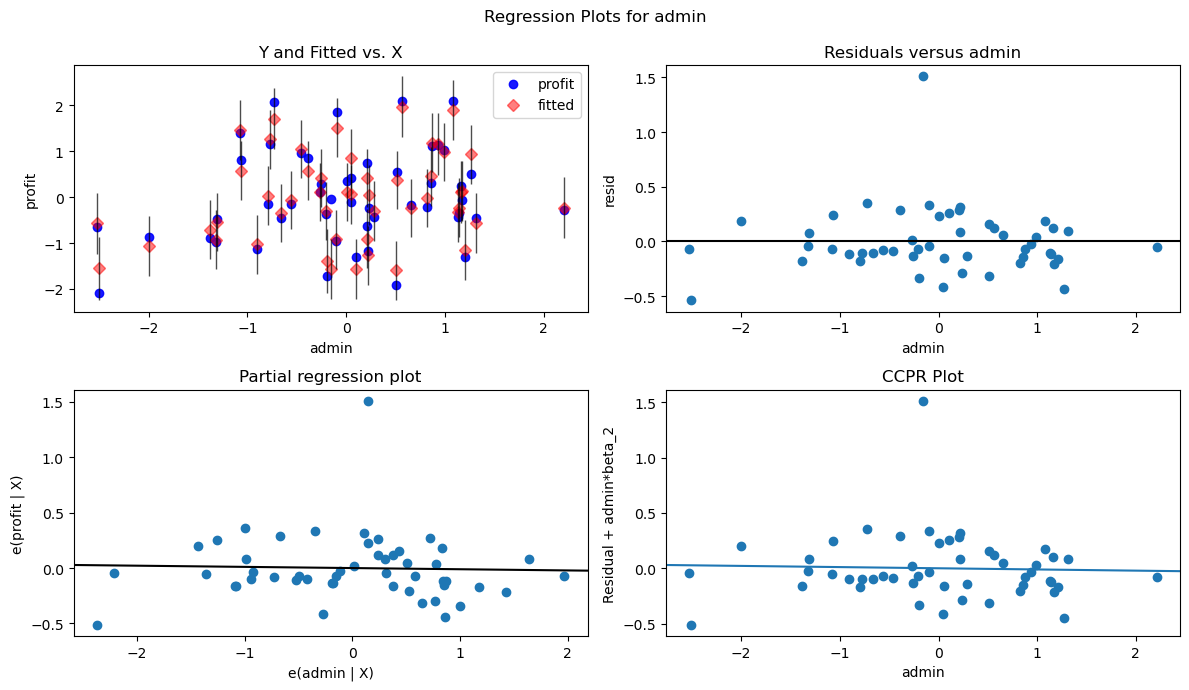

In [132]:
fig = plt.figure(figsize=(12,7))
plot_rds = smf.graphics.plot_regress_exog(final_model, "admin", fig=fig)
plt.show()

eval_env: 1


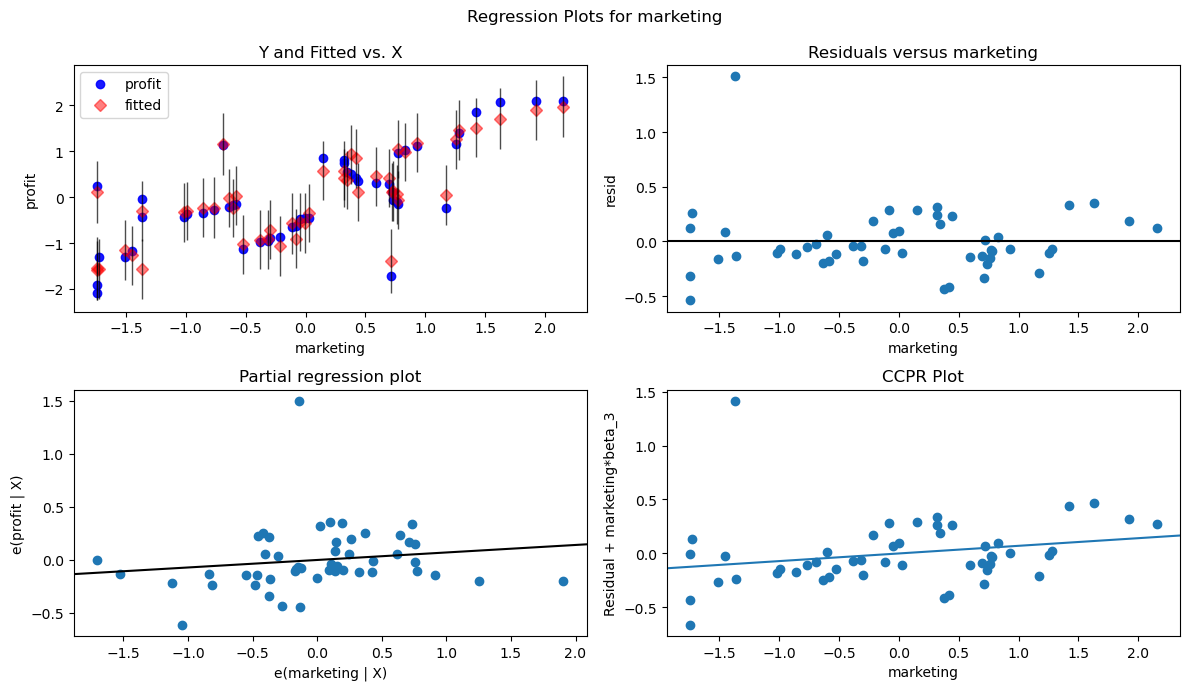

In [133]:
fig = plt.figure(figsize=(12,7))
plot_rds = smf.graphics.plot_regress_exog(final_model, "marketing", fig=fig)
plt.show()

In [139]:
from statsmodels.graphics.regressionplots import influence_plot

In [140]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance

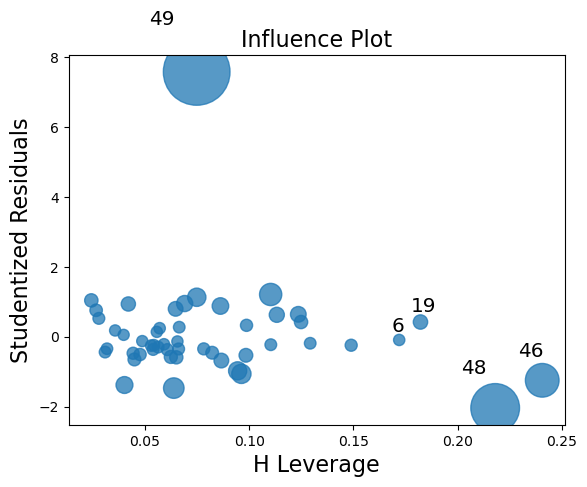

In [142]:
influence_plot(final_model)
plt.show()